In [1]:
import pandas as pd
import sqlite3
from pprint import pprint
from tqdm.notebook import tqdm
import sys
sys.path.append("..")

In [2]:
colors = {
    'Arsenal': ('#EF0107', '#FFFFFF'),
    'Aston Villa': ('#95BFE5', '#490A3D'),
    'Brentford': ('#FFD700', '#000000'),
    'Brighton': ('#0057B8', '#FFFFFF'),
    'Bournemouth': ('#E62333', '#000000'),
    'Burnley': ('#6C1D45', '#99D6EA'),
    'Cardiff City': ('#0047A0', '#FFFFFF'),
    'Chelsea': ('#034694', '#DBA111'),
    'Crystal Palace': ('#1B458F', '#C4122E'),
    'Everton': ('#003399', '#FFFFFF'),
    'Fulham': ('#FFFFFF', '#000000'),
    'Huddersfield': ('#0073C2', '#FFFFFF'),
    'Leeds United': ('#FFCD00', '#1C2C5B'),
    'Leicester City': ('#0053A0', '#FDBE11'),
    'Liverpool': ('#C8102E', '#F6EB61'),
    'Manchester City': ('#6CABDD', '#1C2C5B'),
    'Manchester Utd': ('#E20E2D', '#FFE500'),
    'Newcastle Utd': ('#000000', '#FFFFFF'),
    'Norwich City': ('#00A650', '#FFF200'),
    'Sheffield Utd': ('#EE2737', '#FFFFFF'),
    'Southampton': ('#D71920', '#FFFFFF'),
    'Stoke City': ('#E03A3E', '#FFFFFF'),
    'Swansea City': ('#FFFFFF', '#000000'),
    'Tottenham': ('#001C58', '#FFFFFF'),
    'Watford': ('#FBEE23', '#ED2127'),
    'West Ham': ('#7A263A', '#FFFFFF'),
    'West Brom': ('#091453', '#FFFFFF'),
    'Wolves': ('#FDB913', '#231F20'),
}

In [3]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def plot_elos(team_df, x_axis, y_axis, color_by, tooltips):
    fig = make_subplots(rows=1, cols=3, shared_yaxes=True, subplot_titles=x_axis, y_title=y_axis,)
    for idx, axis in enumerate(x_axis):
        fig.add_trace(
            go.Scatter(x=team_df[axis], 
                       y=team_df[y_axis], 
                       marker_color=team_df[color_by], 
                       text=team_df[tooltips].apply(lambda x: '<br>'.join(x), axis=1),
                       showlegend=False,
                       ),
            row=1, col=idx+1)
    fig.update_traces(mode='markers')
    fig.update_layout(height=400, width=1200)
    fig.show()

In [10]:
with sqlite3.connect('../data/fpl.db') as con:
    processed_data = pd.read_sql_query('select * from "02_PROCESSED_DATA"', con)
team_df = processed_data[processed_data["TEAM"]=="Manchester City"]
team_df.loc[team_df.index,"OPPONENT_COLOR"] = team_df["OPPONENT"].map(lambda x: colors[x][0])
plot_elos(team_df, ["ATT_TOTAL", "HOME_ATT_TOTAL", "AWAY_ATT_TOTAL"], "XG", "OPPONENT_COLOR", ["OPPONENT", "SEASON"])

C:\Users\ongmk\AppData\Local\Temp\ipykernel_1816\785360062.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
team_df = processed_data[processed_data["TEAM"]=="Manchester City"]
att_corr = team_df['XG'].corr(team_df['ATT_TOTAL'])
home_att_corr = team_df['XG'].corr(team_df['HOME_ATT_TOTAL'])
away_att_corr = team_df['XG'].corr(team_df['AWAY_ATT_TOTAL'])
def_corr = team_df['XGA'].corr(team_df['DEF_TOTAL'])
home_def_corr = team_df['XGA'].corr(team_df['HOME_DEF_TOTAL'])
away_def_corr = team_df['XGA'].corr(team_df['AWAY_DEF_TOTAL'])

import statistics
print(statistics.mean([att_corr,
home_att_corr,
away_att_corr,
def_corr,
home_def_corr,
away_def_corr]))

0.13807140304569618


In [12]:
processed_data.columns

Index(['index', 'SEASON', 'TEAM', 'DATE', 'ROUND', 'VENUE', 'GF', 'GA',
       'OPPONENT', 'XG', 'XGA', 'POSS', 'DAYS_TILL_NEXT', 'DAYS_SINCE_LAST',
       'ATT_TOTAL', 'HOME_ATT_TOTAL', 'AWAY_ATT_TOTAL', 'DEF_TOTAL',
       'HOME_DEF_TOTAL', 'AWAY_DEF_TOTAL', 'XG_MA', 'XGA_MA'],
      dtype='object')

In [13]:
numerical_features = ['ROUND', 'XGA', 'POSS', 'DAYS_TILL_NEXT', 'DAYS_SINCE_LAST', 'ATT_TOTAL', 'HOME_ATT_TOTAL', 'AWAY_ATT_TOTAL'] 
# 'DEF_TOTAL', 'HOME_DEF_TOTAL', 'AWAY_DEF_TOTAL', 'DATE']
categorical_features = ['VENUE', 'TEAM', 'OPPONENT']
target = "XG"

In [14]:
one_hot_encoded_features = pd.get_dummies(processed_data[categorical_features+["index"]])
one_hot_encoded_columns =  [col for col in one_hot_encoded_features.columns if col != 'index']
processed_data = pd.merge(processed_data, one_hot_encoded_features, on="index")
processed_data.head()

,index,SEASON,TEAM,DATE,ROUND,VENUE,GF,GA,OPPONENT,XG,...,OPPONENT_Norwich City,OPPONENT_Sheffield Utd,OPPONENT_Southampton,OPPONENT_Stoke City,OPPONENT_Swansea City,OPPONENT_Tottenham,OPPONENT_Watford,OPPONENT_West Brom,OPPONENT_West Ham,OPPONENT_Wolves
0,0,2017-2018,Arsenal,2017-08-11,1,Home,4,3,Leicester City,2.5,...,0,0,0,0,0,0,0,0,0,0
1,1,2017-2018,Leicester City,2017-08-11,1,Away,3,4,Arsenal,1.5,...,0,0,0,0,0,0,0,0,0,0
2,2,2017-2018,Bournemouth,2017-08-12,1,Away,0,1,West Brom,0.5,...,0,0,0,0,0,0,0,1,0,0
3,3,2017-2018,Brighton,2017-08-12,1,Home,0,2,Manchester City,0.3,...,0,0,0,0,0,0,0,0,0,0
4,4,2017-2018,Burnley,2017-08-12,1,Away,3,2,Chelsea,0.6,...,0,0,0,0,0,0,0,0,0,0


In [23]:
train_data = processed_data[processed_data['SEASON'] < "2021-2022"]
test_data = processed_data[processed_data['SEASON'] >= "2021-2022"]

X_train = train_data[numerical_features+one_hot_encoded_columns]
y_train = train_data[target]

# Separate features and target for the test_data
X_test = test_data[numerical_features+one_hot_encoded_columns]
y_test = test_data[target]

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

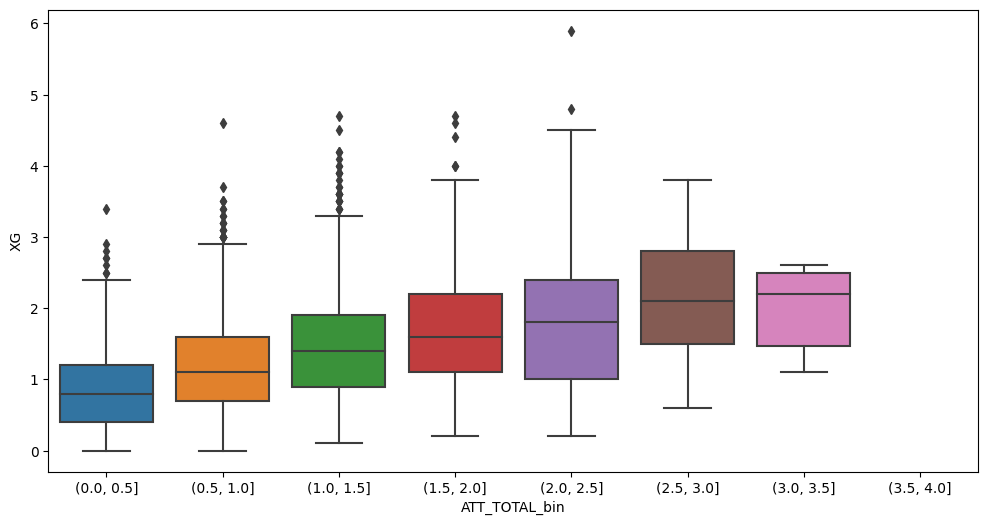

In [25]:
copy_df = train_data[["ATT_TOTAL", "XG"]].copy()
copy_df['ATT_TOTAL_bin'] = pd.cut(copy_df['ATT_TOTAL'], bins=[x/2 for x in range(9)])
plt.figure(figsize=(12, 6))
sns.boxplot(x='ATT_TOTAL_bin', y='XG', data=copy_df)
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb
parameters = dict(random_seed=42, n_estimators=1000, learning_rate=0.01)

In [32]:
xgb_model = xgb.XGBRegressor(
    n_estimators=parameters["n_estimators"],
    learning_rate=parameters["learning_rate"],
    objective ='reg:squarederror', 
    eval_metric='mae', 
    seed=parameters["random_seed"]
    )
xgb_model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
        verbose=100
    )
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

[0]	validation_0-mae:0.68206	validation_1-mae:0.82223


c:\Users\ongmk\miniconda3\envs\fpl\lib\site-packages\xgboost\sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[62]	validation_0-mae:0.26473	validation_1-mae:0.59136
Mean Squared Error:  0.5533050561772637


In [8]:
X_train.columns

NameError: name 'X_train' is not defined